In [ ]:

import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/content/placement-dataset.csv')

In [ ]:
data.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
data.shape

(100, 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
df=data.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


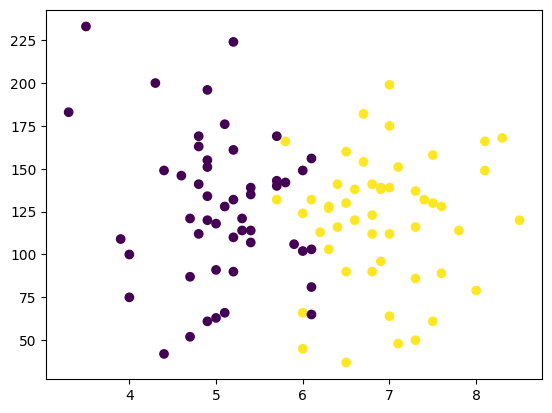

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data['cgpa'],data['iq'],c=data['placement'])

In [ ]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]


In [ ]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y.shape

(100,)

In [ ]:
# step 2 :scale and values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
x_train

,cgpa,iq
16,5.2,224.0
98,6.3,103.0
17,3.3,183.0
15,5.1,176.0
96,4.4,42.0
...,...,...
34,4.8,163.0
53,8.3,168.0
75,4.8,169.0
57,6.5,130.0


In [ ]:
y_train

16    0
98    1
17    0
15    0
96    0
     ..
34    0
53    1
75    0
57    1
19    0
Name: placement, Length: 90, dtype: int64

In [ ]:
x_train

,cgpa,iq
16,5.2,224.0
98,6.3,103.0
17,3.3,183.0
15,5.1,176.0
96,4.4,42.0
...,...,...
34,4.8,163.0
53,8.3,168.0
75,4.8,169.0
57,6.5,130.0


In [ ]:
# we want to scale value
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [ ]:
X_train=scalar.fit_transform(x_train)

In [ ]:
X_train

array([[-0.65733906,  2.55473346],
       [ 0.29129894, -0.5187362 ],
       [-2.29589561,  1.51330985],
       [-0.74357888,  1.33550582],
       [-1.34725761, -2.06817132],
       [-0.48485942,  0.39568452],
       [ 0.03257949,  0.64969028],
       [ 0.46377858,  0.92909661],
       [ 0.11881931,  0.21788049],
       [-0.8298187 , -0.82354311],
       [ 1.15369712, -0.18852872],
       [ 1.15369712, -1.86496671],
       [ 0.11881931, -1.07754887],
       [-1.43349742,  1.94511964],
       [ 0.46377858, -0.84894369],
       [ 1.41241658,  0.11627819],
       [ 0.80873785,  0.37028395],
       [ 1.58489622, -0.23932987],
       [ 0.89497767,  1.91971907],
       [ 1.32617676,  0.87829546],
       [-1.7784567 , -0.36633275],
       [-0.91605851,  0.26868165],
       [-0.48485942,  0.29408222],
       [-0.8298187 , -0.13772757],
       [-1.69221688, -1.22995232],
       [-0.65733906,  0.95449719],
       [ 1.75737585, -1.12835002],
       [ 0.80873785,  0.39568452],
       [ 0.03257949,

In [ ]:
x_test=scalar.transform(x_test)
x_test

array([[ 0.5500184 ,  0.37028395],
       [-0.13990015,  1.08150007],
       [-0.22613997,  1.15770179],
       [-0.22613997,  0.21788049],
       [-0.48485942, -0.4171339 ],
       [ 1.15369712, -0.95054599],
       [-0.91605851,  1.84351734],
       [ 0.11881931, -1.48395808],
       [ 1.32617676, -1.58556038],
       [ 1.32617676,  0.16707934]])

In [ ]:
# from here we train our model using logical regression
from sklearn.linear_model import LogisticRegression

In [ ]:
# we creat an object name;clf
clf=LogisticRegression()

In [ ]:

clf.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# evaluation te model
y_pred=clf.predict(x_test)

In [ ]:
y_test

48    1
85    1
84    0
87    1
81    0
90    1
80    0
56    0
44    1
83    1
Name: placement, dtype: int64

In [ ]:
# now we want to call function which is inside matrix Library
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred) #accuraccy

0.7

In [ ]:
# visualise our data accuracy to show this we want to use desigion library called mlxtend
from mlxtend.plotting import plot_decision_regions

<Axes: >

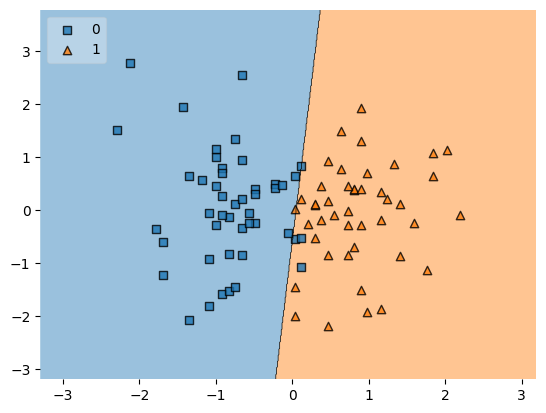

In [ ]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [ ]:
import pickle
pickle.dump(clf,open('model.pk1','wb'))
